In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import seaborn as sbn
from sklearn.preprocessing import LabelEncoder
from word2number import w2n

In [2]:
df1 = pd.read_csv('CSV/cars.csv')

In [4]:
df1.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
df1.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [5]:
df2 = df1.drop('price',axis=1)

In [6]:
df2.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [7]:
df2['normalized_peakrpm'] = abs(df2.peakrpm - df2.peakrpm.mean()) / df2.peakrpm.std()
df2['normalized_curbweight'] =abs(df2.curbweight - df2.curbweight.mean()) / df2.curbweight.std()

In [8]:
df2.normalized_curbweight.head()

0    0.014531
1    0.014531
2    0.513625
3    0.419770
4    0.515545
Name: normalized_curbweight, dtype: float64

<Axes: xlabel='carbody', ylabel='price'>

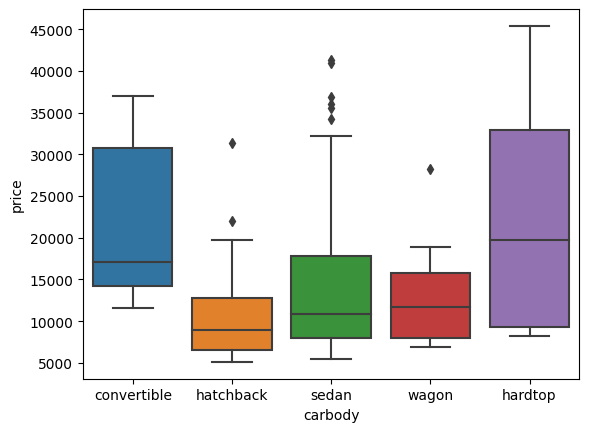

In [6]:
sbn.boxplot(x='carbody',y='price',data=df1)

In [10]:
names=[x for x in df2.CarName]
brand=[]
for i in names:
    brand.append(i.split(" ")[0])

In [11]:
brand_df = pd.DataFrame(brand)
df2['CarBrand'] = brand_df

In [12]:
df2.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'normalized_peakrpm', 'normalized_curbweight', 'CarBrand'],
      dtype='object')

In [13]:
len(df2['fuelsystem'].unique())

8

In [14]:
len(df2['CarBrand'].unique())

23

In [15]:
df3 = df2.drop(['car_ID','CarName','carbody','enginelocation','curbweight','peakrpm'],axis=1)

In [16]:
df3.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,enginetype,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,citympg,highwaympg,normalized_peakrpm,normalized_curbweight,CarBrand
0,3,gas,std,two,rwd,88.6,168.8,64.1,48.8,dohc,...,mpfi,3.47,2.68,9.0,111,21,27,0.262318,0.014531,alfa
1,3,gas,std,two,rwd,88.6,168.8,64.1,48.8,dohc,...,mpfi,3.47,2.68,9.0,111,21,27,0.262318,0.014531,alfa
2,1,gas,std,two,rwd,94.5,171.2,65.5,52.4,ohcv,...,mpfi,2.68,3.47,9.0,154,19,26,0.262318,0.513625,alfa
3,2,gas,std,four,fwd,99.8,176.6,66.2,54.3,ohc,...,mpfi,3.19,3.40,10.0,102,24,30,0.785932,0.419770,audi
4,2,gas,std,four,4wd,99.4,176.6,66.4,54.3,ohc,...,mpfi,3.19,3.40,8.0,115,18,22,0.785932,0.515545,audi


In [17]:
dummy_fueltype=pd.get_dummies(df3.fueltype,dtype=int)

In [18]:
dummy_fueltype.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [19]:
df3 = pd.concat([df3,dummy_fueltype],axis=1)

In [20]:
df3.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,enginetype,...,stroke,compressionratio,horsepower,citympg,highwaympg,normalized_peakrpm,normalized_curbweight,CarBrand,diesel,gas
0,3,gas,std,two,rwd,88.6,168.8,64.1,48.8,dohc,...,2.68,9.0,111,21,27,0.262318,0.014531,alfa,0,1
1,3,gas,std,two,rwd,88.6,168.8,64.1,48.8,dohc,...,2.68,9.0,111,21,27,0.262318,0.014531,alfa,0,1
2,1,gas,std,two,rwd,94.5,171.2,65.5,52.4,ohcv,...,3.47,9.0,154,19,26,0.262318,0.513625,alfa,0,1
3,2,gas,std,four,fwd,99.8,176.6,66.2,54.3,ohc,...,3.40,10.0,102,24,30,0.785932,0.419770,audi,0,1
4,2,gas,std,four,4wd,99.4,176.6,66.4,54.3,ohc,...,3.40,8.0,115,18,22,0.785932,0.515545,audi,0,1


In [21]:
len(df3.drivewheel.unique())
df3.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [22]:
df3.doornumber = df3.doornumber.apply(w2n.word_to_num)

In [23]:
df3.cylindernumber = df3.cylindernumber.apply(w2n.word_to_num)

In [24]:
df3.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,enginetype,...,stroke,compressionratio,horsepower,citympg,highwaympg,normalized_peakrpm,normalized_curbweight,CarBrand,diesel,gas
0,3,gas,std,2,rwd,88.6,168.8,64.1,48.8,dohc,...,2.68,9.0,111,21,27,0.262318,0.014531,alfa,0,1
1,3,gas,std,2,rwd,88.6,168.8,64.1,48.8,dohc,...,2.68,9.0,111,21,27,0.262318,0.014531,alfa,0,1
2,1,gas,std,2,rwd,94.5,171.2,65.5,52.4,ohcv,...,3.47,9.0,154,19,26,0.262318,0.513625,alfa,0,1
3,2,gas,std,4,fwd,99.8,176.6,66.2,54.3,ohc,...,3.40,10.0,102,24,30,0.785932,0.419770,audi,0,1
4,2,gas,std,4,4wd,99.4,176.6,66.4,54.3,ohc,...,3.40,8.0,115,18,22,0.785932,0.515545,audi,0,1


In [25]:
dummy_asp = pd.get_dummies(df3.aspiration,dtype=int) 
dummy_asp.head()
df3 = pd.concat([df3,dummy_asp],axis=1)

In [26]:
df3.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,enginetype,...,horsepower,citympg,highwaympg,normalized_peakrpm,normalized_curbweight,CarBrand,diesel,gas,std,turbo
0,3,gas,std,2,rwd,88.6,168.8,64.1,48.8,dohc,...,111,21,27,0.262318,0.014531,alfa,0,1,1,0
1,3,gas,std,2,rwd,88.6,168.8,64.1,48.8,dohc,...,111,21,27,0.262318,0.014531,alfa,0,1,1,0
2,1,gas,std,2,rwd,94.5,171.2,65.5,52.4,ohcv,...,154,19,26,0.262318,0.513625,alfa,0,1,1,0
3,2,gas,std,4,fwd,99.8,176.6,66.2,54.3,ohc,...,102,24,30,0.785932,0.419770,audi,0,1,1,0
4,2,gas,std,4,4wd,99.4,176.6,66.4,54.3,ohc,...,115,18,22,0.785932,0.515545,audi,0,1,1,0


In [27]:
dummy_drivewheel = pd.get_dummies(df3.drivewheel,dtype=int)

In [28]:
df3 = pd.concat([df3,dummy_drivewheel.fwd,dummy_drivewheel.rwd,dummy_drivewheel['4wd']],axis=1)

In [29]:
dummy_enginetype = pd.get_dummies(df3.enginetype,dtype=int)
dummy_enginetype.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [30]:
df3 = pd.concat([df3,dummy_enginetype.dohc,dummy_enginetype.dohcv,dummy_enginetype.l,dummy_enginetype.ohc,dummy_enginetype.ohcv,dummy_enginetype.rotor],axis=1)

In [31]:
dummy_fuelsystem = pd.get_dummies(df3.fuelsystem,dtype=int)
dummy_fuelsystem.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [32]:
df3 = pd.concat([df3,dummy_fuelsystem['1bbl'],dummy_fuelsystem['2bbl'],dummy_fuelsystem['4bbl'],dummy_fuelsystem.idi,dummy_fuelsystem.mpfi,dummy_fuelsystem.spdi,dummy_fuelsystem.spfi],axis=1)

In [33]:
df3.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'drivewheel',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'citympg', 'highwaympg',
       'normalized_peakrpm', 'normalized_curbweight', 'CarBrand', 'diesel',
       'gas', 'std', 'turbo', 'fwd', 'rwd', '4wd', 'dohc', 'dohcv', 'l', 'ohc',
       'ohcv', 'rotor', '1bbl', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [34]:
dummy_carBrand = pd.get_dummies(df3.CarBrand,dtype=int)
dummy_carBrand
df3.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,enginetype,...,ohc,ohcv,rotor,1bbl,2bbl,4bbl,idi,mpfi,spdi,spfi
0,3,gas,std,2,rwd,88.6,168.8,64.1,48.8,dohc,...,0,0,0,0,0,0,0,1,0,0
1,3,gas,std,2,rwd,88.6,168.8,64.1,48.8,dohc,...,0,0,0,0,0,0,0,1,0,0
2,1,gas,std,2,rwd,94.5,171.2,65.5,52.4,ohcv,...,0,1,0,0,0,0,0,1,0,0
3,2,gas,std,4,fwd,99.8,176.6,66.2,54.3,ohc,...,1,0,0,0,0,0,0,1,0,0
4,2,gas,std,4,4wd,99.4,176.6,66.4,54.3,ohc,...,1,0,0,0,0,0,0,1,0,0


In [35]:
for i in dummy_carBrand:
    df3 = pd.concat([df3,dummy_carBrand[i]],axis=1)

In [36]:
df3.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,enginetype,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,gas,std,2,rwd,88.6,168.8,64.1,48.8,dohc,...,0,0,0,0,0,0,0,0,0,0
1,3,gas,std,2,rwd,88.6,168.8,64.1,48.8,dohc,...,0,0,0,0,0,0,0,0,0,0
2,1,gas,std,2,rwd,94.5,171.2,65.5,52.4,ohcv,...,0,0,0,0,0,0,0,0,0,0
3,2,gas,std,4,fwd,99.8,176.6,66.2,54.3,ohc,...,0,0,0,0,0,0,0,0,0,0
4,2,gas,std,4,4wd,99.4,176.6,66.4,54.3,ohc,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df4 = df3.drop(['fueltype','aspiration','drivewheel','enginetype','fuelsystem','CarBrand'],axis=1)
df4.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,cylindernumber,enginesize,boreratio,stroke,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,2,88.6,168.8,64.1,48.8,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,6,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,4,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,5,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df4.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'citympg', 'highwaympg',
       'normalized_peakrpm', 'normalized_curbweight', 'diesel', 'gas', 'std',
       'turbo', 'fwd', 'rwd', '4wd', 'dohc', 'dohcv', 'l', 'ohc', 'ohcv',
       'rotor', '1bbl', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi', 'spfi', 'alfa',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

In [39]:
df4.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [40]:
x = df4
y = df1.price

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [42]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [43]:
cross_linear = cross_val_score(LinearRegression(),X_train,y_train,cv=3) 
cross_linear

array([0.93281168, 0.72269045, 0.89889757])

In [44]:
cross_rfc = cross_val_score(RandomForestRegressor(),X_train,y_train,cv=3)
cross_rfc

array([0.91797867, 0.78857602, 0.91893812])

In [45]:
def best_model(x,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False]        
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[60,80,100]
            }
        },
        
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=3,test_size=0.2,random_state=10)
    for algo_name ,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [46]:
best_model(X_train,y_train)

,model,best_score,best_params
0,linear_regression,0.818088,{'fit_intercept': True}
1,random_forest,0.915443,{'n_estimators': 80}
2,lasso,0.853388,"{'alpha': 2, 'selection': 'random'}"
3,decision_tree,0.883448,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [47]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
model.score(X_test,y_test)

0.8909044896849023

In [49]:
np.array(y_test)

array([ 9895. , 18150. , 10795. , 11845. , 36000. ,  8495. ,  6295. ,
       11549. ,  8058. , 22470. , 15250. ,  8948. ,  7788. , 17075. ,
       31400.5, 13499. , 10595. , 17950. , 16500. , 16500. ,  7295. ,
       16430. ,  8449. , 16558. , 17710. , 16503. ,  8949. ,  6575. ,
        8845. , 14399. ,  7799. ,  7898. ,  6795. , 15645. , 31600. ,
       28248. , 11048. , 13499. , 10198. ,  5389. , 10898. ])

In [50]:
model.predict(X_test)

array([10595.79      , 19767.97835   , 11130.39      , 11702.78      ,
       37920.86      , 10376.9       ,  7168.65      , 12303.07      ,
        8271.445     , 17331.06      , 14372.45167   , 12158.19      ,
        7905.695     , 14509.89      , 36928.92      , 18893.22167   ,
        9905.4       , 15946.37      , 12924.36      , 14310.04668   ,
        7466.68166667, 14653.38      , 10070.98      , 16485.14      ,
       17642.3       , 18123.96835   ,  9704.41      ,  7550.455     ,
       10603.        , 19345.99167   ,  7487.125     ,  8236.03      ,
        6087.52      , 15556.79167   , 27270.71      , 25815.98      ,
        9813.215     , 18853.04167   , 10034.83      ,  5869.59      ,
       10509.44      ])

In [51]:
# df4.to_csv('Cars_model.csv')

In [52]:
import pickle,json

with open('model.pickle','wb') as f:
    pickle.dump(model,f)

In [53]:
columns = {
    'data_coulmns':[col.lower() for col in x.columns]
}
with  open('columns.json','w+') as f:
    f.write(json.dumps(columns))

In [54]:
with open('model.pickle','rb') as f:
    pickle.load(f)
model

RandomForestRegressor()

In [55]:
with open('columns.json','r') as f:
    val = f.read()
    
json_data = json.loads(val)
# json_data

In [56]:
x.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'citympg', 'highwaympg',
       'normalized_peakrpm', 'normalized_curbweight', 'diesel', 'gas', 'std',
       'turbo', 'fwd', 'rwd', '4wd', 'dohc', 'dohcv', 'l', 'ohc', 'ohcv',
       'rotor', '1bbl', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi', 'spfi', 'alfa',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

In [57]:
np.where(x.columns=="alfa")[0][0]

36

In [58]:
# Original

def predict_price(symboling,doornumber,wheelbase,carlength,carwidth,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,citympg,highwaympg,normalized_peakrpm,normalized_curbweight,label_fueltype,label_aspiration,cars,drive,engine,fuel):
    try:
        drive_index = np.where(x.columns==cars)[0][0]
        engine_index = np.where(x.columns==engine)[0][0]
        fuel_index = np.where(x.columns==fuel)[0][0]
        car_index = np.where(x.columns==drive)[0][0]
    except:
        car_index = -1
        drive_index = -1
        engine_index = -1
        fuel_index = -1


    X = np.zeros(len(x.columns))

    X[0] = symboling
    X[1] = doornumber
    X[2]= wheelbase
    X[3]= carlength
    X[4] = carwidth
    X[5] = carheight
    X[6] = cylindernumber
    X[7] = enginesize
    X[8] = boreratio
    X[9] = stroke
    X[10] = compressionratio
    X[11] = horsepower
    X[12] = citympg
    X[13] = highwaympg
    X[14] = normalized_peakrpm
    X[15] = normalized_curbweight
    X[16] = label_fueltype
    X[17] = label_aspiration

    if car_index >=0 and drive_index >=0 and engine_index>=0 and fuel_index>=0:
        X[car_index] = 1
        X[drive_index] = 1
        X[engine_index] = 1
        X[fuel_index] = 1
    return (model.predict([X])[0])

In [59]:
predict_price(3,2,88.6,168.8,64.1,48.8,4,130,3.47,2.68,9,111,21,27,0.262318066,0.014530711,1,0,"bmw","rwd","dohc","gas")

13463.48

In [60]:
# duplicate
def predict_price(symboling,doornumber,wheelbase,carlength,carwidth,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,citympg,highwaympg,normalized_peakrpm,normalized_curbweight,fuel_tp,asp_tp,drive,engine,fuel_stm,cars):
    try:
        drive_index = json_data.index(drive.lower())
        engine_index = json_data.index(engine.lower())
        fuel_index = json_data.index(fuel_stm.lower())
        car_index = json_data.index(cars.lower())
        fuel_type_index = json_data.index(fuel_tp.lower())
        asp_type_index = json_data.index(asp_tp.lower())

    except:
        car_index = -1
        drive_index = -1
        engine_index = -1
        fuel_index = -1
        fuel_type_index = -1
        asp_type_index = -1


    X = np.zeros(len(json_data))

    X[0] = symboling
    X[1] = doornumber
    X[2]= wheelbase
    X[3]= carlength
    X[4] = carwidth
    X[5] = carheight
    X[6] = cylindernumber
    X[7] = enginesize
    X[8] = boreratio
    X[9] = stroke
    X[10] = compressionratio
    X[11] = horsepower
    X[12] = citympg
    X[13] = highwaympg
    X[14] = normalized_peakrpm
    X[15] = normalized_curbweight



    if car_index >=0 and drive_index >=0 and engine_index>=0 and fuel_index>=0 and fuel_type_index>=0 and asp_type_index>=0:
        X[car_index] = 1
        X[drive_index] = 1
        X[engine_index] = 1
        X[fuel_index] = 1
        X[fuel_type_index] = 1
        X[asp_type_index] = 1

    return round((model.predict([X])[0]),2)


In [61]:
asp_type_index = np.where(x.columns=='turbo')[0][0]
asp_type_index

19

In [62]:
# trail

def predict_price_try(symboling,doornumber,wheelbase,carlength,carwidth,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,citympg,highwaympg,normalized_peakrpm,normalized_curbweight,fuel_tp,asp_tp,drive,engine,fuel_stm,cars):
    try:
        drive_index = np.where(x.columns==cars)[0][0]
        engine_index = np.where(x.columns==engine)[0][0]
        fuel_index = np.where(x.columns==fuel)[0][0]
        car_index = np.where(x.columns==drive)[0][0]
        fuel_type_index = np.where(x.columns==fuel_tp)[0][0]
        asp_type_index = np.where(x.columns==asp_tp)[0][0]
        
    except:
        car_index = -1
        drive_index = -1
        engine_index = -1
        fuel_index = -1
        fuel_type_index = -1
        asp_type_index = -1


    X = np.zeros(len(x.columns))

    X[0] = symboling
    X[1] = doornumber
    X[2]= wheelbase
    X[3]= carlength
    X[4] = carwidth
    X[5] = carheight
    X[6] = cylindernumber
    X[7] = enginesize
    X[8] = boreratio
    X[9] = stroke
    X[10] = compressionratio
    X[11] = horsepower
    X[12] = citympg
    X[13] = highwaympg
    X[14] = normalized_peakrpm
    X[15] = normalized_curbweight

    if car_index >=0 and drive_index >=0 and engine_index>=0 and fuel_index>=0 and fuel_type_index>=0 and asp_type_index>=0:
        X[car_index] = 1
        X[drive_index] = 1
        X[engine_index] = 1
        X[fuel_index] = 1
        X[fuel_type_index] = 1
        X[asp_type_index] = 1

    return round((model.predict([X])[0]),2)

In [63]:
predict_price_try(3,2,88.6,168.8,64.1,48.8,4,130,3.47,2.68,9,111,21,27,0.262318066,0.014530711,"gas","turbo","rwd","dohc","mpfi","bmw")

12726.32